Plots for Allison's lya results 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/'
os.listdir(path)

['oehua1010_noSR_smearingcorr_MCMC_results.csv',
 'allfour2_noSR_nosmearing_MCMC_results.csv',
 'allfour_noSR_nosmearing_MCMC_results.csv',
 'allfour_SR_ISMfixedonly_equalweighting_MCMC_results.csv',
 'allfour_SR_ISMfixedonly_MCMC_results.csv',
 'allfour_SR_RVvaryonly_MCMC_results.csv',
 'allfour_SR_sameprofile_MCMC_results.csv',
 'NV_allfour_MCMC_results.csv',
 'NV_allfour_v2_MCMC_results.csv',
 'oehua1010_noSR_nosmearing_MCMC_results.csv',
 'oehua1010_SR_nosmearing_MCMC_results.csv',
 'oehua2010_noSR_nosmearing_MCMC_results.csv',
 'oehua2010_noSR_smearingcorr_MCMC_results.csv',
 'oehua2010_SR_nosmearing_MCMC_results.csv',
 'oehua3010_noSR_nosmearing_MCMC_results.csv',
 'oehua3010_noSR_smearingcorr_MCMC_results.csv',
 'oehua3010_SR_nosmearing_MCMC_results.csv',
 'oehua4010_noSR_nosmearing_MCMC_results.csv',
 'oehua4010_noSR_smearingcorr_MCMC_results.csv',
 'oehua4010_SR_nosmearing_MCMC_results.csv',
 'SiIII_allfour_MCMC_results.csv',
 'SiIII_allfour_v2_MCMC_results.csv']

In [4]:
sr_specs = glob.glob('{}*0_SR_nosmearing*'.format(path))
# args = np.argsort(sr_specs)
# sr_specs = sr_specs[args]
sr_specs


['/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua1010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua2010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua3010_SR_nosmearing_MCMC_results.csv',
 '/media/david/2tb_ext_hd/hddata/eg_uma/lya_results/oehua4010_SR_nosmearing_MCMC_results.csv']

In [5]:
phase = np.array([0.73, 0.03, 0.3, 0.53])
phase_sort = phase[np.argsort(phase)]
sr_specs_phase = np.array(sr_specs)[np.argsort(phase)]

In [6]:
data = Table.read(sr_specs[1])

In [7]:
data.dtype.names

('col0',
 'lya_model_low_2sig',
 'lya_model_low_1sig',
 'lya_model_median',
 'lya_model_high_1sig',
 'lya_model_high_2sig',
 'lya_intrinsic_low_2sig',
 'lya_intrinsic_low_1sig',
 'lya_intrinsic_median',
 'lya_intrinsic_high_1sig',
 'lya_intrinsic_high_2sig',
 'lya_ism_low_2sig',
 'lya_ism_low_1sig',
 'lya_ism_median',
 'lya_ism_high_1sig',
 'lya_ism_high_2sig',
 'lya_reversal_low_2sig',
 'lya_reversal_low_1sig',
 'lya_reversal_median',
 'lya_reversal_high_1sig',
 'lya_reversal_high_2sig',
 'lya_intrinsic_fluxes',
 'vs_n value',
 'am_n value',
 'fw_L_n value',
 'fw_G_n value',
 'h1_col value',
 'h1_b value',
 'h1_vel value',
 'h1_col2 value',
 'h1_b2 value',
 'h1_vel2 value',
 'h1_col3 value',
 'h1_b3 value',
 'h1_vel3 value',
 'd2h value',
 'p value',
 'wave_lya',
 'flux_lya',
 'error_lya')

Horray, the same, I don't have to change everything!

--
0.9658106577697897
--
1.1467725510469893
--
0.9980820978536894
--
1.2636655487587138


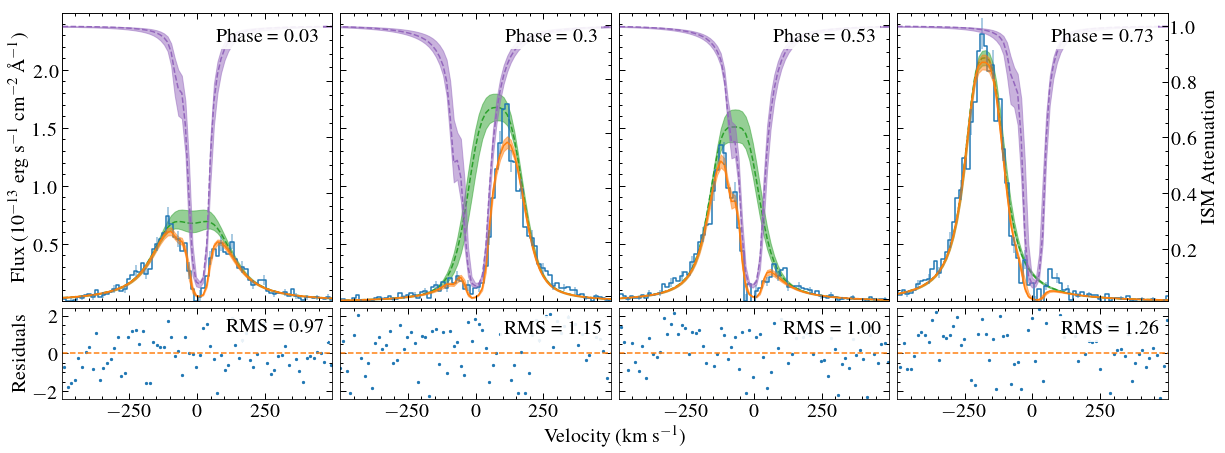

In [10]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    print(data['h1_b value'][2])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    rms = np.mean(((data['flux_lya']-data['lya_model_median'])/data['error_lya'])**2)**0.5
    print(rms)
    plt.annotate('RMS = {0:.2f}'.format(rms), (0.97, 0.87), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    

And the same without SR

In [ ]:
nosr_specs = glob.glob('{}*0_noSR_nosmearing*'.format(path))
nosr_specs

In [ ]:
nosr_specs_phase = np.array(nosr_specs)[np.argsort(phase)]

In [ ]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
        
    rms = np.mean(((data['flux_lya']-data['lya_model_median'])/data['error_lya'])**2)**0.5
    print(rms)
    plt.annotate('RMS = {0:.2f}'.format(rms), (0.97, 0.87), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
   
    
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_fit_nosr.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_fit_nosr.pdf')
    

In [ ]:
plt.figure(figsize=(7,6))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, label='Phase = {}'.format(phase_sort[i]))
    plt.fill_between((v-v_ly).value, data['lya_intrinsic_high_1sig']*fscale, data['lya_intrinsic_low_1sig']*fscale, alpha=0.5, zorder=-10) 
    
    
plt.gca().set_prop_cycle(None)
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, ls='--')
    plt.fill_between((v-v_ly).value, data['lya_intrinsic_high_1sig']*fscale, data['lya_intrinsic_low_1sig']*fscale, alpha=0.5, zorder=-10, hatch='*')
plt.xlim(-499, 599)
plt.ylim(0.01, 2.3)
plt.legend(frameon=True)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
# plt.savefig('plots/intrinsic_ly_all.pdf')

because I can. Well that did not work, cyberpunk version needs a lot of work.

In [ ]:
data.dtype.names

In [ ]:
# data['fw_L_n value']

In [ ]:
#cleaner version
lya = 1215.67
fig, axes = plt.subplots(3, 2, figsize=(16,12), sharex=True)
# gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
xlims = [-0.09, 1.09]



allsr = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))
allnosr = Table.read('{}allfour_noSR_nosmearing_MCMC_results.csv'.format(path))

#lya flux
plt.subplot(321)
plt.annotate('a.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)
f_sr = []
f_sr_eu = []
f_sr_ed = []
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    flya = data['lya_intrinsic_fluxes'][2]
    flya_err = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])*fscale
    flya *= fscale
    f_sr.append(flya)
    f_sr_eu.append(flya_err[1][0])
    f_sr_ed.append(flya_err[0][0])

    
    if i == 0:
        plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C0', marker = 'o', label = 'SR', ls='none')
    else:
        plt.errorbar(phase_sort[i], flya, yerr=flya_err, c='C0', marker = 'o', ls='none')
    
dataset = 'OEHUA1010'.lower()    
fall = allsr['{}_intrinsic_fluxes'.format(dataset)][2]*fscale 
fallel = (allsr['{}_intrinsic_fluxes'.format(dataset)][2]-allsr['{}_intrinsic_fluxes'.format(dataset)][1])*fscale
falleu = (allsr['{}_intrinsic_fluxes'.format(dataset)][3]-allsr['{}_intrinsic_fluxes'.format(dataset)][2])*fscale

plt.errorbar(1, fall, yerr=[[fallel], [falleu]], c='C3', marker='o')
        
print(f_sr_ed)
        
f_nosr = []
f_nosr_eu = []
f_nosr_ed = []
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    flya = data['lya_intrinsic_fluxes'][2]
    flya_err = np.array([[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]])*fscale 
    flya *= fscale
    f_nosr.append(flya)
    f_nosr_eu.append(flya_err[1][0])
    f_nosr_ed.append(flya_err[0][0])

    if i == 0:
        plt.errorbar(phase_sort[i]+0.02, flya, yerr=flya_err, c='C1', marker = 's', alpha =1 , zorder=-1, label='No SR', ls='none')
    else:
        plt.errorbar(phase_sort[i]+0.02, flya, yerr=flya_err, c='C1', marker = 's', alpha =1 , zorder=-1, ls='none')

fall = allnosr['{}_intrinsic_fluxes'.format(dataset)][2]*fscale 
fallel = (allnosr['{}_intrinsic_fluxes'.format(dataset)][2]-allnosr['{}_intrinsic_fluxes'.format(dataset)][1])*fscale
falleu = (allnosr['{}_intrinsic_fluxes'.format(dataset)][3]-allnosr['{}_intrinsic_fluxes'.format(dataset)][2])*fscale

plt.errorbar(1.02, fall, yerr=[[fallel], [falleu]], c='C3', marker='s')        
        
plt.axhline(np.mean(f_sr), ls='--', c='C0', alpha=0.5)
plt.axhline(np.mean(f_nosr), ls='--', c='C1', alpha=0.5)




plt.legend(frameon=True, loc=4)
# plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
# plt.ylabel(r'Ly\,$\alpha$ Intrinsic Flux$^*$')
plt.ylabel(r'Ly$\alpha$ Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$)')
# plt.annotate(r'$^*$(10$^{-13}$ erg s$^{-1}$ cm$^{-2}$)', (0.98, 0.02), xycoords='axes fraction', ha='right', va='bottom') 
plt.xticks(visible=False)
plt.xlim(xlims[0], xlims[1])

#lyafwhm
fwl = []
fwg = []
plt.subplot(325)
plt.annotate('e.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    fwhml = data['fw_L_n value'][2]
    fwhml_err = np.array([[fwhml-data['fw_L_n value'][1]],[data['fw_L_n value'][3]-fwhml]])
    if i == 0:
        plt.errorbar(phase_sort[i], fwhml, yerr=fwhml_err, marker='o', c='C0', label = r'$FWHM_L$', ls='none')
    else:
        plt.errorbar(phase_sort[i], fwhml, yerr=fwhml_err, marker='o', c='C0', ls='none')
    fwl.append(fwhml)
    
    fwhmg = data['fw_G_n value'][2]
    fwhmg_err = np.array([[fwhmg-data['fw_G_n value'][1]],[data['fw_G_n value'][3]-fwhmg]])
    if i == 0:
        plt.errorbar(phase_sort[i], fwhmg, yerr=fwhmg_err, marker='s', c='C1', label = r'$FWHM_G$', zorder=-1, alpha=1, ls='none')
    else:
        plt.errorbar(phase_sort[i], fwhmg, yerr=fwhmg_err, marker='s', c='C1', zorder=-1, alpha=1, ls='none')
    fwg.append(fwhmg)
plt.axhline(np.mean(fwl), ls='--', c='C0', alpha=0.5)
plt.axhline(np.mean(fwg), ls='--', c='C1', alpha=0.5)  

Lall = allsr['fw_L value']
Lallm, Lallel, Lalleu = Lall[2], Lall[2]-Lall[1], Lall[3]-Lall[2]
plt.errorbar(1, Lallm, yerr=[[Lallel], [Lalleu]], c='C3', marker='o')

Gall = allsr['fw_G value']
Gallm, Gallel, Galleu = Gall[2], Gall[2]-Gall[1], Gall[3]-Gall[2]
plt.errorbar(1, Gallm, yerr=[[Gallel], [Galleu]], c='C3', marker='s')



plt.legend(frameon=True)
plt.ylabel(r'Ly\,$\alpha$ width  (km s$^{-1}$)')
# plt.xticks(visible=False)   
plt.xlim(xlims[0], xlims[1])
plt.xlabel('Phase')

#N(H)
nhs = []
plt.subplot(324)
plt.annotate('d.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    nh = data['h1_col value'][2]
    nh_err = np.array([[nh-data['h1_col value'][1]],[data['h1_col value'][3]-nh]])
    plt.errorbar(phase_sort[i], nh, yerr=nh_err, marker='o', c='C0', ls='none')
    nhs.append(nh)
plt.ylabel('log N(H{\sc i})')
plt.xticks(visible=False) 
plt.xlim(xlims[0], xlims[1])
plt.axhline(np.mean(nhs), ls='--', c='C0', alpha=0.5)

Hall = allsr['h1_col value']
Hallm, Hallel, Halleu = Hall[2], Hall[2]-Hall[1], Hall[3]-Hall[2]
plt.errorbar(1, Hallm, yerr=[[Hallel], [Halleu]], c='C3', marker='o')


#v(ISM)
ismvs = []
plt.subplot(326)
plt.annotate('f.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    vism = data['h1_vel value'][2]
    vism_err = np.array([[vism-data['h1_vel value'][1]],[data['h1_vel value'][3]-vism]])
    plt.errorbar(phase_sort[i], vism, yerr=vism_err, marker='o', c='C0', ls='none')
    ismvs.append(vism)
plt.ylabel(r'$V_{\mathrm{ISM}}$ (km s$^{-1}$)')
# plt.xticks(visible=False) 
plt.xlim(xlims[0], xlims[1])
plt.axhline(np.mean(ismvs), ls='--', c='C0', alpha=0.5)

Vall = allsr['h1_vel value']
Vallm, Vallel, Valleu = Vall[2], Vall[2]-Vall[1], Vall[3]-Vall[2]
plt.errorbar(1, Vallm, yerr=[[Vallel], [Valleu]], c='C3', marker='o')

plt.xlabel('Phase')

#v(lines)
plt.subplot(322)
plt.annotate('b.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

vlyas= [] 
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    vlya = data['vs_n value'][2]
    vlya_err = np.array([[vlya-data['vs_n value'][1]],[data['vs_n value'][3]-vlya]])
    if i == 0:
        plt.errorbar(phase_sort[i], vlya, yerr=vlya_err, marker='o', c='C0', label= r'Ly$\alpha$', ls='none')
    else:
        plt.errorbar(phase_sort[i], vlya, yerr=vlya_err, marker='o', c='C0', ls='none')
    vlyas.append(vlya)




data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
vnvs = []
#oehua4010_SR_nosmearing_MCMC_results.csv
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][5]
    name = 'vs{} value'.format(speci)
    vNv = data[name][2]
    vNv_err = np.array([[vNv-data[name][1]],[data[name][3]-vNv]])
    if i == 0:
        plt.errorbar(phase_sort[i], vNv, yerr=vNv_err, marker='s', c='C1', label= r'N\,{\sc v}', ls='none', zorder=-1, alpha=1)
    else:
        plt.errorbar(phase_sort[i], vNv, yerr=vNv_err, marker='s', c='C1', ls='none', zorder=-1, alpha=1)
    vnvs.append(vNv)
        
        
data = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))
vsis =[]
#oehua4010_SR_nosmearing_MCMC_results.csv
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][5]
    name = 'vs{} value'.format(speci)
    vsi = data[name][2]
    vsi_err = np.array([[vsi-data[name][1]],[data[name][3]-vsi]])
    if i == 0:
        plt.errorbar(phase_sort[i], vsi, yerr=vsi_err, marker='*', c='C2', label= r'Si\,{\sc iii}', ls='none', zorder=-2, alpha=1)
    else:
        plt.errorbar(phase_sort[i], vsi, yerr=vsi_err, marker='*', c='C2', ls='none', zorder=-2, alpha=1)
    vsis.append(vsi)


fitter = fitting.LevMarLSQFitter()

allvs = np.array([vlyas, vnvs, vsis])
allvs = np.mean(allvs, axis=0)
print(allvs)
# #add a sine curve for reference

gamma = -29.0*u.km/u.s
gamma_e = 4.8*u.km/u.s
k2 = 124.9*u.km/u.s
# k2 = 126.0*u.km/u.s # (2.5)
k2_e = 0.4*u.km/u.s
k2_range = [k2-k2_e,k2+k2_e]
gamma_range = [gamma-gamma_e, gamma+gamma_e]

orbit = models.Sine1D(k2.value, 1, phase=0.5, bounds=dict(amplitude=k2_range), fixed=dict(frequency=True))+models.Const1D(gamma.value, bounds=dict(amplitude=gamma_range))
orbfit = fitter(orbit, phase_sort, allvs, maxiter=10000)
plt.plot(np.linspace(xlims[0], xlims[1], 100), orbfit(np.linspace(xlims[0], xlims[1], 100)), alpha=0.5, ls='--')
print(orbfit)

        
plt.legend(frameon=True)
plt.ylabel(r'$V_{\mathrm{Line}}$ (km s$^{-1}$)')
plt.xticks(visible=False) 
plt.xlim(xlims[0], xlims[1])

#line_fluxes
plt.subplot(323)
plt.annotate('c.', (0.03, 0.97), xycoords='axes fraction', ha='left', va='top', size=20)

data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
#oehua4010_SR_nosmearing_MCMC_results.csv
#oehua1010_model_tmp_fluxes
fnvs =[]
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][:9]
    # print(speci)
    name = '{}_model_tmp_fluxes'.format(speci)
    fNv = data[name][2]
    fNv_err = np.array([[fNv-data[name][1]],[data[name][3]-fNv]])
    fNv, fNv_err = fNv*fscale, fNv_err*fscale
    if i == 0:
        plt.errorbar(phase_sort[i], fNv, yerr=fNv_err, marker='s', c='C1', label= r'N\,{\sc v}', ls='none', zorder=-1, alpha=1)
    else:
        plt.errorbar(phase_sort[i], fNv, yerr=fNv_err, marker='s', c='C1', ls='none', zorder=-1, alpha=1)
    fnvs.append(fNv)
        
        
data = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))
#oehua4010_SR_nosmearing_MCMC_results.csv
fsis = []
for i, spec in enumerate(sr_specs_phase):
    speci = os.path.split(spec)[1][:9]
    name = '{}_model_tmp_fluxes'.format(speci)
    fsi = data[name][2]
    fsi_err = np.array([[fsi-data[name][1]],[data[name][3]-fsi]])
    fsi, fsi_err = fsi*fscale, fsi_err*fscale
    if i == 0:
        plt.errorbar(phase_sort[i], fsi, yerr=fsi_err, marker='*', c='C2', label= r'Si\,{\sc iii}', ls='none', zorder=-2, alpha=1)
    else:
        plt.errorbar(phase_sort[i], fsi, yerr=fsi_err, marker='*', c='C2', ls='none', zorder=-2, alpha=1)
    fsis.append(fsi)
    
plt.axhline(np.mean(fnvs), ls='--', alpha =0.5, c='C1')
plt.axhline(np.mean(fsis), ls='--', alpha =0.5, c='C2')

nvdata = Table.read('{}NV_allfour_v2_MCMC_results.csv'.format(path))
sidata = Table.read('{}SiIII_allfour_v2_MCMC_results.csv'.format(path))

name = '{}_model_tmp_fluxes'.format(dataset)
fsi, fsieu, fsied = sidata[name][2]*fscale, sidata[name][3]*fscale, sidata[name][1]*fscale 
fn, fneu, fned = nvdata[name][2]*fscale, nvdata[name][3]*fscale, nvdata[name][1]*fscale 

plt.errorbar(1, fn, yerr=[[fn-fned], [fneu-fn]], marker='s', c='C3')
plt.errorbar(1, fsi, yerr=[[fsi-fsied], [fsieu-fsi]], marker='*', c='C3')



plt.legend(frameon=True)
plt.ylabel('Line Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$)')
plt.xticks(visible=False) 

plt.xlim(xlims[0], xlims[1])
# plt.xlabel('Phase')

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
# plt.xlabel('Phase', size=20)


plt.tight_layout()
plt.subplots_adjust(hspace=0.03)

plt.savefig('plots/lya_results_sum.pdf')



In [ ]:
data = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))

In [ ]:
data

In [ ]:

# flya = np.array([])
# flya_err = np.array([[],[]])
# flya_err = []
# flya_err = np.ndarray(shape=(len(sr_specs_phase), 2, 1))
# # print(flya_err)
# # plt.subplot(611)
# for i, spec in enumerate(sr_specs_phase):
#     data = Table.read(spec)
#     flyai = data['lya_intrinsic_fluxes'][2]

#     flya_erri = [[flya - data['lya_intrinsic_fluxes'][1]], [data['lya_intrinsic_fluxes'][3]-flya]]
#     flya_err[[i][0][0]] = flya - data['lya_intrinsic_fluxes'][1]
#     flya_err[[1], [i]] = [data['lya_intrinsic_fluxes'][3]-flya]
    
#     # flya = np.append(flyai*fscale)
#     flya = np.append(flya, flyai)
#     # flya_err = np.append(flya_err, flya_erri*fscale, axis=1)
#     # flya_err[i] = flya_erri*fscale
#     flya_err.append(flya_erri)
# # print(flya_err[1:])
# flya_err = np.array(flya_err[1:])
# print(flya_err)
# plt.errorbar(phase_sort, flya, yerr=flya_err, c='C3', marker='o', ls='none', label = 'SR_test')
  


What happens if I move the big line over to the small line?

In [ ]:
sr_specs_phase

In [ ]:
fig, axes = plt.subplots(figsize=(7,8))
gs = GridSpec(4, 1, figure=fig)

plt.subplot(gs[:3])
data1 = Table.read(sr_specs_phase[2])
v1 = (data1['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
l1 = data1['lya_intrinsic_median']
i1 = data1['lya_ism_median']
rv1 = data1['vs_n value'][2]

data2= Table.read(sr_specs_phase[3])
w2 = data2['wave_lya']
v2 = (data2['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
f2 = data2['flux_lya']
i2 = data2['lya_ism_median']

rv2 = data2['vs_n value'][2]

l3 = interp1d(v1.value-rv1+rv2, l1, fill_value='extrapolate')(v2)

fit1 = l3*i2**3
fit2 = l3*i2

plt.step(v2, f2*fscale, where='mid', c='C0')
# plt.plot(v2, fit1*fscale, label= ('0.73 ISM'), c='C1')
plt.plot(v2, fit2*fscale, label= (' ISM'),c='C4')
plt.plot(v2, fit1*fscale, label= ('ISM cubed'),c='C1')

plt.plot(v2, l3*fscale,c='C2', ls='--', zorder = -1)


plt.xlim(-499, 499)
plt.ylim(0.01, 2.49)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xticks(visible=False)
plt.legend()

plt.subplot(gs[3:])
plt.xlabel('Velocity (km s$^{-1}$)', size=20)


plt.scatter(v, ((f2)-(fit1))/(data2['error_lya']), alpha=1, s=5, c='C1')
plt.scatter(v, ((f2)-(fit2))/(data2['error_lya']), alpha=1, s=5, c='C4')

print(np.mean(((f2-fit1)/data2['error_lya'])**2)**0.5)
print(np.mean(((f2-fit2)/data2['error_lya'])**2)**0.5)

plt.ylabel('Residuals')
plt.xlim(-499, 499)

plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)

mask = (w2 > 1205) & (w2 < 1225)

if1 = np.trapz(fit2[mask]*fscale, w2[mask])
if2 = np.trapz(f2[mask]*fscale, w2[mask])

print((if1-if2)/if1)


# plt.savefig('plots/shifted_fit.pdf')
# plt.savefig('plots/shifted_fit_pow.png', facecolor='w')

In [ ]:
fig, axes = plt.subplots(figsize=(7,8))
gs = GridSpec(4, 1, figure=fig)

plt.subplot(gs[:3])
data1 = Table.read(sr_specs_phase[3])
v1 = (data1['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
l1 = data1['lya_intrinsic_median']
i1 = data1['lya_ism_median']
f1 = data1['flux_lya']


pw = 3.0
fit1 = l1*i1
fit2 = l1*i1**pw

plt.step(v1, f1*fscale, where='mid', c='C0')
plt.plot(v1, fit1*fscale, label= 'ISM', c='C1')
plt.plot(v1, fit2*fscale, label= r'ISM',c='C4')

plt.plot(v1, l1*fscale,c='C2', ls='--', zorder = -1)


plt.xlim(-499, 499)
plt.ylim(0.01, 2.49)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xticks(visible=False)
plt.legend()

plt.subplot(gs[3:])
plt.xlabel('Velocity (km s$^{-1}$)', size=20)


plt.scatter(v1, ((f1)-(fit1))/(data1['error_lya']), alpha=1, s=5, c='C1')
plt.scatter(v1, ((f1)-(fit2))/(data1['error_lya']), alpha=1, s=5, c='C4')

print((np.mean(((f1-fit1))/data1['error_lya'])**2)**0.5)
print((np.mean(((f1-fit2))/data1['error_lya'])**2)**0.5)

plt.ylabel('Residuals')
plt.xlim(-499, 499)

plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)

# plt.savefig('plots/shifted_fit.pdf')

In [ ]:
f_sr = []
ed = []
eu = []

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    flya = data['lya_intrinsic_fluxes'][2]
    flya_err = np.array([flya - data['lya_intrinsic_fluxes'][1], data['lya_intrinsic_fluxes'][3]-flya])
    f_sr.append(flya)
    ed.append(flya_err[0])
    eu.append(flya_err[1])
    
f_sr, ed, eu = np.array(f_sr), np.array(ed), np.array(eu)

In [ ]:
(f_sr[3]-f_sr[0])/eu[0]

In [ ]:
plt.errorbar(phase_sort, f_sr, yerr=([ed,eu]), marker='o', ls='none')
plt.errorbar(phase_sort[0], f_sr[0], yerr=eu[0]*7, marker='o', ls='none')
plt.axhline(f_sr[3])

In [ ]:


plt.figure(figsize=(7,6))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    # print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v, data['lya_ism_median'], label='Phase = {}'.format(phase_sort[i]))
    
plt.gca().set_prop_cycle(None)
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    # print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v, data['lya_ism_median'], ls='--')
plt.xlim(-499, 599)
# plt.ylim(0.01, 2.3)
plt.legend(frameon=True)
plt.ylabel('ISM Attenuation', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
# plt.savefig('plots/intrinsic_ly_all.pdf')

Does applying the ISM from one change the others

In [ ]:
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale

data1 = Table.read(sr_specs_phase[3])
i1 = data1['lya_ism_median']

# plt.figure(figsize=(20, 5))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.plot(v, data['lya_intrinsic_median']*fscale*i1, c='C4', ls='-', label=r'Test', zorder=10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
#     ax2=ax.twinx()
#     ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
#     ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
#     if i < 3:
#         ax2.set_yticklabels([])
#     if i == 3:
#         ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya'])-(data['lya_model_median']))/(data['error_lya']), alpha=1, s=5)
    plt.scatter(v, ((data['flux_lya'])-(data['lya_intrinsic_median']*i1))/(data['error_lya']), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
# plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
# plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    

In [ ]:
1.56e-01/7.80e-02 

In [ ]:
dataset_phase = ['OEHUA2010', 'OEHUB3010', 'OEHUA4010', 'OEHUA1010']

    

nvdata = Table.read('{}NV_allfour_MCMC_results.csv'.format(path))
sidata = Table.read('{}SiIII_allfour_MCMC_results.csv'.format(path))

allsr = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))
allnosr = Table.read('{}allfour_noSR_nosmearing_MCMC_results.csv'.format(path))

fscale = 1e13

for i in range(len(sr_specs_phase)+1):
    if i < len(sr_specs_phase):
        spec = sr_specs_phase[i]
        row = '{} & {} & '.format(dataset_phase[i],phase_sort[i])
        data = Table.read(sr_specs_phase[i])
        nosrdata = Table.read(nosr_specs_phase[i])
        flya, flyaeu, flyaed  = data['lya_intrinsic_fluxes'][2]*fscale, data['lya_intrinsic_fluxes'][3]*fscale, data['lya_intrinsic_fluxes'][1]*fscale
        nflya, nflyaeu, nflyaed  = nosrdata['lya_intrinsic_fluxes'][2]*fscale, nosrdata['lya_intrinsic_fluxes'][3]*fscale, nosrdata['lya_intrinsic_fluxes'][1]*fscale
        vlya, vlyaeu, vlyaed = data['vs_n value'][2], data['vs_n value'][3], data['vs_n value'][1]
        nvlya, nvlyaeu, nvlyaed = nosrdata['vs_n value'][2], nosrdata['vs_n value'][3], nosrdata['vs_n value'][1]
        p, peu, ped = data['p value'][2], data['p value'][3], data['p value'][1]
        nh, nheu, nhed = data['h1_col value'][2], data['h1_col value'][3], data['h1_col value'][1]
        vism, vismeu, vismed = data['h1_vel value'][2], data['h1_vel value'][3], data['h1_vel value'][1]
        speci = os.path.split(spec)[1][:9]
        name = '{}_model_tmp_fluxes'.format(speci)
        fsi, fsieu, fsied = sidata[name][2]*fscale, sidata[name][3]*fscale, sidata[name][1]*fscale 
        speci = os.path.split(spec)[1][5]
        name = 'vs{} value'.format(speci)
        vsi, vsieu, vsied = sidata[name][2], sidata[name][3], sidata[name][1]
        speci = os.path.split(spec)[1][:9]
        name = '{}_model_tmp_fluxes'.format(speci)
        fn, fneu, fned = nvdata[name][2]*fscale, nvdata[name][3]*fscale, nvdata[name][1]*fscale 
        speci = os.path.split(spec)[1][5]
        name = 'vs{} value'.format(speci)
        vn, vneu, vned = nvdata[name][2], nvdata[name][3], nvdata[name][1] 

        row += '{{{:.2f}}}$^{{+{:.2f}}}_{{-{:.2f}}}$ & '.format(flya, flyaeu-flya, flya-flyaed)
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ & '.format(vlya, vlyaeu-vlya, vlya-vlyaed)
        row += '{{{:.2f}}}$^{{+{:.2f}}}_{{-{:.2f}}}$ & '.format(p, peu-p, p-ped)

        row += '{{{:.2f}}}$^{{+{:.2f}}}_{{-{:.2f}}}$ & '.format(nflya, nflyaeu-nflya, nflya-nflyaed)
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ & '.format(nvlya, nvlyaeu-nvlya, nvlya-nvlyaed)

        row += '{{{:.3f}}}$^{{+{:.3f}}}_{{-{:.3f}}}$ & '.format(fsi, fsieu-fsi, fsi-fsied)
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ & '.format(vsi, vsieu-vsi, vsi-vsied)

        row += '{{{:.3f}}}$^{{+{:.3f}}}_{{-{:.3f}}}$ & '.format(fn, fneu-fn, fsi-fned)
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ & '.format(vn, vneu-vn, vn-vned)

        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ & '.format(nh, nheu-nh, nh-nhed)
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ \\\ '.format(vism, vismeu-vism, vism-vismed)
    else:
        # joint fit
        row = 'All & -- &'
        dataset = 'OEHUA1010'.lower()
        fall = allsr['{}_intrinsic_fluxes'.format(dataset)][2]*fscale 
        fallel = (allsr['{}_intrinsic_fluxes'.format(dataset)][2]-allsr['{}_intrinsic_fluxes'.format(dataset)][1])*fscale
        falleu = (allsr['{}_intrinsic_fluxes'.format(dataset)][3]-allsr['{}_intrinsic_fluxes'.format(dataset)][2])*fscale
        row += '{{{:.2f}}}$^{{+{:.2f}}}_{{-{:.2f}}}$ & -- &  '.format(fall, fallel, falleu)
        p, peu, ped = allsr['p value'][2], allsr['p value'][3], allsr['p value'][1]
        row += '{{{:.2f}}}$^{{+{:.2f}}}_{{-{:.2f}}}$ & '.format(p, peu-p, p-ped)
        fall = allnosr['{}_intrinsic_fluxes'.format(dataset)][2]*fscale 
        fallel = (allnosr['{}_intrinsic_fluxes'.format(dataset)][2]-allnosr['{}_intrinsic_fluxes'.format(dataset)][1])*fscale
        falleu = (allnosr['{}_intrinsic_fluxes'.format(dataset)][3]-allnosr['{}_intrinsic_fluxes'.format(dataset)][2])*fscale
        row += '{{{:.2f}}}$^{{+{:.2f}}}_{{-{:.2f}}}$ & -- &  '.format(fall, fallel, falleu)
        
        nvdata = Table.read('{}NV_allfour_v2_MCMC_results.csv'.format(path))
        sidata = Table.read('{}SiIII_allfour_v2_MCMC_results.csv'.format(path))
        
        name = '{}_model_tmp_fluxes'.format(dataset)
        fsi, fsieu, fsied = sidata[name][2]*fscale, sidata[name][3]*fscale, sidata[name][1]*fscale 
        fn, fneu, fned = nvdata[name][2]*fscale, nvdata[name][3]*fscale, nvdata[name][1]*fscale 
        row += '{{{:.3f}}}$^{{+{:.3f}}}_{{-{:.3f}}}$ & -- & '.format(fsi, fsieu-fsi, fsi-fsied)
       

        row += '{{{:.3f}}}$^{{+{:.3f}}}_{{-{:.3f}}}$ & -- & '.format(fn, fneu-fn, fn-fned)
        
        nh, nheu, nhed = allsr['h1_col value'][2], allsr['h1_col value'][3], allsr['h1_col value'][1]
        vism, vismeu, vismed = allsr['h1_vel value'][2], allsr['h1_vel value'][3], allsr['h1_vel value'][1]
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ & '.format(nh, nheu-nh, nh-nhed)
        row += '{{{:.1f}}}$^{{+{:.1f}}}_{{-{:.1f}}}$ \\\ '.format(vism, vismeu-vism, vism-vismed)
        

        
    
    print(row)

In [ ]:
#compare with kaptyen's star
f_ks = 2.88e-13
d_ks = 3.93 
f_eg = 1.83e-13
f_eg_eu = 0.05e-13
f_eg_el = 0.04e-13
d_eg = 1000/34.8337
prot_eg = 0.66765930

print(f_eg/(f_ks*((d_ks/d_eg)**2)))

In [ ]:
(d_ks/d_eg)**2

In [ ]:
f_eg*4/3*np.pi*(d_eg*u.pc.to(u.cm))**2

Comparison with the FUMES Lya data https://ui.adsabs.harvard.edu/abs/2021ApJ...911..112Y/abstract

In [ ]:
fumes = Table.read('fumes_lya.csv')
fumes

In [ ]:
f_eg = 1.83e-13
f_eg_eu = 0.05e-13
f_eg_el = 0.04e-13
d_eg = 1000/34.8337
prot_eg = 0.66765930

plt.figure(figsize=(6,6))

lya_fumes = fumes['FLya']*fumes['Exponent']
lya_fumes_el = (fumes['FLya']-fumes['FLya_e_lower'])*fumes['Exponent']
lya_fumes_eu = (fumes['FLya_e_upper']-fumes['FLya'])*fumes['Exponent']

dscale = ((fumes['Distance']*u.pc).to(u.cm)/const.au.to(u.cm))**2
# dscale = ((fumes['Distance']*u.pc)/(10*u.pc))**2
plt.errorbar(fumes['Prot'], lya_fumes*dscale, yerr=[lya_fumes_el*dscale, lya_fumes_eu*dscale], ls='none', marker='o')

eg_scale = ((d_eg*u.pc).to(u.cm)/const.au.to(u.cm))**2
# print(eg_scale)

plt.errorbar(prot_eg, f_eg*eg_scale, yerr=[[f_eg_el*eg_scale], [f_eg_eu*eg_scale]], marker='o', ls='none')



plt.yscale('log')
plt.xscale('log')
print(dscale)

In [ ]:
const.au

Broadening?

In [ ]:


fig, axes = plt.subplots(figsize=(7,8))
gs = GridSpec(4, 1, figure=fig)

plt.subplot(gs[:3])
data1 = Table.read(sr_specs_phase[3])
v1 = (data1['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
l1 = data1['lya_intrinsic_median']
i1 = data1['lya_ism_median']
rv1 = data1['vs_n value'][2]

data2= Table.read(sr_specs_phase[0])
w2 = data2['wave_lya']
v2 = (data2['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
f2 = data2['flux_lya']
i2 = data2['lya_ism_median']

rv2 = data2['vs_n value'][2]

l3 = interp1d(v1.value-rv1+rv2, l1, fill_value='extrapolate')(v2)

l3b = convolve(l3, Gaussian1DKernel(stddev=15))

fit1 = l3*i2
fit2 = l3b*i2

plt.step(v2, f2*fscale, where='mid', c='C0')
# plt.plot(v2, fit1*fscale, label= ('0.73 ISM'), c='C1')
plt.plot(v2, fit1*fscale, label= ('ISM'),c='C1')
plt.plot(v2, fit2*fscale, label= (' Broadened'),c='C4')

plt.plot(v2, l3*fscale,c='C2', ls='--', zorder = -1)


plt.xlim(-499, 499)
plt.ylim(0.01, 2.49)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xticks(visible=False)
plt.legend()

plt.subplot(gs[3:])
plt.xlabel('Velocity (km s$^{-1}$)', size=20)


plt.scatter(v, ((f2)-(fit1))/(data2['error_lya']), alpha=1, s=5, c='C1')
plt.scatter(v, ((f2)-(fit2))/(data2['error_lya']), alpha=1, s=5, c='C4')

print(np.mean(((f2-fit1)/data2['error_lya'])**2)**0.5)
print(np.mean(((f2-fit2)/data2['error_lya'])**2)**0.5)

plt.ylabel('Residuals')
plt.xlim(-499, 499)

plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)

mask = (w2 > 1205) & (w2 < 1225)

if1 = np.trapz(fit2[mask]*fscale, w2[mask])
if2 = np.trapz(f2[mask]*fscale, w2[mask])

print((if1-if2)/if1)


# plt.savefig('plots/shifted_fit.pdf')
# plt.savefig('plots/shifted_fit_pow.png', facecolor='w')

Joint fits.

In [ ]:
data = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))
data.dtype.names

In [ ]:
data = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))

dataset_phase_ay = ['OEHUA2010', 'OEHUA3010', 'OEHUA4010', 'OEHUA1010'] #with OEHUB3010 renamed to match AY's files

lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, dataset in enumerate(dataset_phase_ay):
    dataset = dataset.lower()
    # data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_{}'.format(dataset)]*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_{}'.format(dataset)]*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_{}'.format(dataset)]*fscale, yerr=data['error_{}'.format(dataset)]*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    # print(data['error_{}'.format(dataset)])
   
    plt.plot(v, data['{}_model_median'.format(dataset)]*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['{}_model_high_1sig'.format(dataset)]*fscale,data['{}_model_low_1sig'.format(dataset)]*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['{}_intrinsic_median'.format(dataset)]*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['{}_intrinsic_high_1sig'.format(dataset)]*fscale,data['{}_intrinsic_low_1sig'.format(dataset)]*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['{}_ism_median'.format(dataset)]*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['{}_ism_high_1sig'.format(dataset)]*ism_scale,data['{}_ism_low_1sig'.format(dataset)]*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['{}_ism_median'.format(dataset)], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['{}_ism_high_1sig'.format(dataset)],data['{}_ism_low_1sig'.format(dataset)], color='C4', alpha=0.5, zorder=-10)
  
    
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_{}'.format(dataset)])-(data['{}_model_median'.format(dataset)]))/(data['error_{}'.format(dataset)]), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
        
    # print()
    rms = np.mean(((data['flux_{}'.format(dataset)]-data['{}_model_median'.format(dataset)])/data['error_{}'.format(dataset)])**2)**0.5
    print(rms)
    plt.annotate('RMS = {0:.2f}'.format(rms), (0.97, 0.87), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
   
    
    
    print(data['{}_intrinsic_fluxes'.format(dataset)][2], data['{}_intrinsic_fluxes'.format(dataset)][2]-data['{}_intrinsic_fluxes'.format(dataset)][1], data['{}_intrinsic_fluxes'.format(dataset)][3]-data['{}_intrinsic_fluxes'.format(dataset)][2])
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
plt.savefig('plots/eg_uma_lya_joint_fit.png', dpi=150, facecolor='w')
plt.savefig('plots/eg_uma_lya_joint_fit.pdf')
    

In [ ]:
data = Table.read('{}allfour_SR_sameprofile_MCMC_results.csv'.format(path))

dataset_phase_ay = ['OEHUA2010', 'OEHUA3010', 'OEHUA4010', 'OEHUA1010'] #with OEHUB3010 renamed to match AY's files

lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, dataset in enumerate(dataset_phase_ay):
    dataset = dataset.lower()
    # data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    v = (data['wave_{}'.format(dataset)]*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, data['flux_{}'.format(dataset)]*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    plt.errorbar(v, data['flux_{}'.format(dataset)]*fscale, yerr=data['error_{}'.format(dataset)]*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    # print(data['error_{}'.format(dataset)])
   
    plt.plot(v, data['{}_model_median'.format(dataset)]*fscale, c='C1', label='Model fit', zorder=1)
    plt.fill_between(v.value, data['{}_model_high_1sig'.format(dataset)]*fscale,data['{}_model_low_1sig'.format(dataset)]*fscale, color='C1', alpha=0.5)
    
    plt.plot(v, data['{}_intrinsic_median'.format(dataset)]*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
    plt.fill_between(v.value, data['{}_intrinsic_high_1sig'.format(dataset)]*fscale,data['{}_intrinsic_low_1sig'.format(dataset)]*fscale, color='C2', alpha=0.5, zorder=-10)
    
#     plt.plot(v, data['{}_ism_median'.format(dataset)]*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['{}_ism_high_1sig'.format(dataset)]*ism_scale,data['{}_ism_low_1sig'.format(dataset)]*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
    plt.xlim(-499, 499)
    plt.ylim(0.01, 2.49)
    if i > 0:
        # plt.yticks(visible=False)
        ax.set_yticklabels([])
    if i == 0:
        # plt.legend(loc=2, frameon=True)
        plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
    plt.xticks(visible=False)
    
    ax2=ax.twinx()
    ax2.plot(v, data['{}_ism_median'.format(dataset)], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
    plt.fill_between(v.value, data['{}_ism_high_1sig'.format(dataset)],data['{}_ism_low_1sig'.format(dataset)], color='C4', alpha=0.5, zorder=-10)
  
    ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
    if i < 3:
        ax2.set_yticklabels([])
    if i == 3:
        ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_{}'.format(dataset)])-(data['{}_model_median'.format(dataset)]))/(data['error_{}'.format(dataset)]), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-16,16)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
        
    # print()
    rms = np.mean(((data['flux_{}'.format(dataset)]-data['{}_model_median'.format(dataset)])/data['error_{}'.format(dataset)])**2)**0.5
    print(rms)
    plt.annotate('RMS = {0:.2f}'.format(rms), (0.97, 0.87), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
   
    
    
    print(data['{}_intrinsic_fluxes'.format(dataset)][2], data['{}_intrinsic_fluxes'.format(dataset)][2]-data['{}_intrinsic_fluxes'.format(dataset)][1], data['{}_intrinsic_fluxes'.format(dataset)][3]-data['{}_intrinsic_fluxes'.format(dataset)][2])
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
# plt.savefig('plots/eg_uma_lya_fit_nosr.png', dpi=150, facecolor='w')
# plt.savefig('plots/eg_uma_lya_fit_nosr.pdf')
    

In [ ]:


# plt.figure(figsize=(7,6))
# for i, spec in enumerat
fig, axes = plt.subplots(figsize=(8,6))
ax=plt.subplot(111)
data = Table.read(sr_specs_phase[3])
v_ly = data['vs_n value'][2]*u.km/u.s
print(v_ly)
v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, label='Phase = 0.73'.format(phase_sort[i]))
plt.fill_between((v-v_ly).value, data['lya_intrinsic_high_1sig']*fscale, data['lya_intrinsic_low_1sig']*fscale, alpha=0.5, zorder=-10) 

plt.xlim(-499, 599)
plt.ylim(0.01, 2.3)
# plt.legend(frameon=True)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)

ax2=ax.twinx()
ax2.plot(v, data['lya_ism_median'], c='C0', ls='--', alpha=0.5, zorder=-9)
plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C0', alpha=0.5, zorder=-10)
ax2.set_ylabel('ISM Attenuation')


data = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))
v_ly = data['vs1 value'][2]*u.km/u.s
dataset = 'OEHUA1010'.lower()
 
ax.plot(v-v_ly, data['{}_intrinsic_median'.format(dataset)]*fscale, c='C1', label='Combined Fit', zorder=-1)
ax.fill_between((v-v_ly).value, data['{}_intrinsic_high_1sig'.format(dataset)]*fscale,data['{}_intrinsic_low_1sig'.format(dataset)]*fscale, color='C1', alpha=0.5, zorder=-10)
   
ax2.plot(v, data['{}_ism_median'.format(dataset)], c='C1', ls='--', alpha=1, zorder=-9)
plt.fill_between(v.value, data['{}_ism_high_1sig'.format(dataset)],data['{}_ism_low_1sig'.format(dataset)], color='C1', alpha=0.5, zorder=-10)

    
# plt.gca().set_prop_cycle(None)
# for i, spec in enumerate(nosr_specs_phase):
#     data = Table.read(spec)
#     v_ly = data['vs_n value'][2]*u.km/u.s
#     print(v_ly)
#     v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
#     plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, ls='--')
#     plt.fill_between((v-v_ly).value, data['lya_intrinsic_high_1sig']*fscale, data['lya_intrinsic_low_1sig']*fscale, alpha=0.5, zorder=-10, hatch='*')
# plt.xlim(-499, 599)
# plt.ylim(0.01, 2.3)
ax.legend(frameon=True, loc=5)
# plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
# plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.savefig('plots/combined_v_phase073.pdf')

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(121)

for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    # print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, label='Phase = {}'.format(phase_sort[i]), alpha=0.7)
    # plt.fill_between((v-v_ly).value, data['lya_intrinsic_high_1sig']*fscale, data['lya_intrinsic_low_1sig']*fscale, alpha=0.5, zorder=-10) 
    
#add combined fit
data = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))
v_ly = data['vs1 value'][2]*u.km/u.s
dataset = 'OEHUA1010'.lower()
plt.plot(v-v_ly, data['{}_intrinsic_median'.format(dataset)]*fscale, label='All', lw=2, c='k')
 

plt.gca().set_prop_cycle(None)
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    # print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ly, data['lya_intrinsic_median']*fscale, ls='--', alpha=0.7)
    # plt.fill_between((v-v_ly).value, data['lya_intrinsic_high_1sig']*fscale, data['lya_intrinsic_low_1sig']*fscale, alpha=0.5, zorder=-10, hatch='*')
    

data = Table.read('{}allfour_noSR_nosmearing_MCMC_results.csv'.format(path))
v_ly = data['vs1 value'][2]*u.km/u.s
dataset = 'OEHUA1010'.lower()
plt.plot(v-v_ly, data['{}_intrinsic_median'.format(dataset)]*fscale, ls='--', lw=2, c='k')


plt.xlim(-499, 499)
plt.ylim(0.01, 2.3)
# plt.legend(frameon=True)
plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)




plt.subplot(122)
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    v_ly = data['vs_n value'][2]*u.km/u.s
    # print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v, data['lya_ism_median'], label='Phase = {}'.format(phase_sort[i]), alpha=0.7)
    
data = Table.read('{}allfour_SR_RVvaryonly_MCMC_results.csv'.format(path))
v_ism = data['h1_vel value'][2]*u.km/u.s
v = (data['wave_{}'.format(dataset)]*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
plt.plot(v, data['{}_ism_median'.format(dataset)], label='All', lw=2, c='k')
    
plt.gca().set_prop_cycle(None)
for i, spec in enumerate(nosr_specs_phase):
    data = Table.read(spec)
    v_ism = data['h1_vel value'][2]*u.km/u.s
    # print(v_ly)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.plot(v-v_ism, data['lya_ism_median'], ls='--', alpha=0.7)
    
data = Table.read('{}allfour_noSR_nosmearing_MCMC_results.csv'.format(path))
v_ism = data['h1_vel value'][2]*u.km/u.s
v = (data['wave_{}'.format(dataset)]*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))

plt.plot(v-v_ism, data['{}_ism_median'.format(dataset)], lw=2, ls='--', c='k')    

plt.xlim(-499, 499)
# plt.ylim(0.01, 2.3)
plt.legend(frameon=True)
plt.ylabel('ISM Attenuation', size=20)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
# plt.tight_layout()
# plt.savefig('plots/intrinsic_ly_all.pdf')


plt.tight_layout()
plt.savefig('plots/intrinsic_ly_ism_all.pdf')




In [ ]:
1.2/1.8

0.9658106577697897
1.1467725510469893
0.9980820978536894
1.2636655487587138


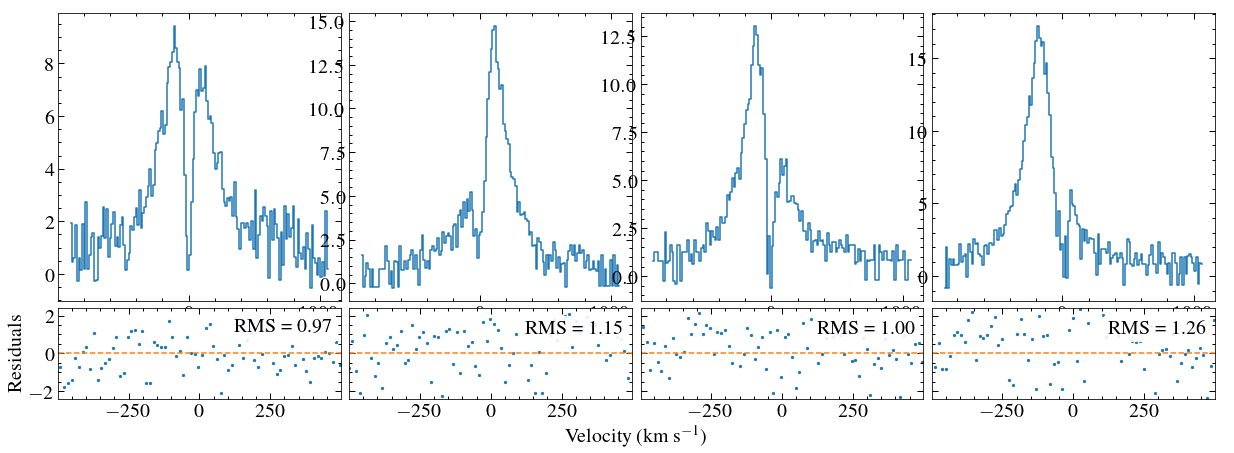

In [24]:
#S/N
lya = 1215.67
fig, axes = plt.subplots(figsize=(18,7))
gs = GridSpec(4, 4, figure=fig)
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale
# plt.figure(figsize=(20, 5))
for i, spec in enumerate(sr_specs_phase):
    data = Table.read(spec)
    ax = plt.subplot(gs[0:3, i])
    # print(data['h1_b value'][2])
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    plt.step(v, (data['flux_lya']/data['error_lya']), where='mid')
    # plt.step(v, data['flux_lya']*1e-1)
    # plt.step(v, data['error_lya'])
    
#     plt.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
#     plt.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
#     plt.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
#     plt.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
#     plt.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
#     plt.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)
    
# #     plt.plot(v, data['lya_ism_median']*ism_scale, c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
# #     plt.fill_between(v.value, data['lya_ism_high_1sig']*ism_scale,data['lya_ism_low_1sig']*ism_scale, color='C4', alpha=0.5, zorder=-10)
    
#     plt.xlim(-499, 499)
#     plt.ylim(0.01, 2.49)
#     if i > 0:
#         # plt.yticks(visible=False)
#         ax.set_yticklabels([])
#     if i == 0:
#         # plt.legend(loc=2, frameon=True)
#         plt.ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)
#     plt.xticks(visible=False)
    
#     ax2=ax.twinx()
#     ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
#     plt.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    
#     ax2.annotate('Phase = {}'.format(phase_sort[i]), (0.95, 0.95), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
    
#     if i < 3:
#         ax2.set_yticklabels([])
#     if i == 3:
#         ax2.set_ylabel('ISM Attenuation')
        
    
    
    
    plt.subplot(gs[3:, i])
    plt.scatter(v, ((data['flux_lya']*fscale)-(data['lya_model_median']*fscale))/(data['error_lya']*fscale), alpha=1, s=5)
    plt.xlim(-499, 499)
    plt.ylim(-2.4,2.4)
    if i > 0:
        plt.yticks(visible=False)
    plt.axhline(0, ls='--', c='C1')
    if i == 0:
        plt.ylabel('Residuals')
    rms = np.mean(((data['flux_lya']-data['lya_model_median'])/data['error_lya'])**2)**0.5
    print(rms)
    plt.annotate('RMS = {0:.2f}'.format(rms), (0.97, 0.87), xycoords = 'axes fraction', ha='right', va='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
     
        
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
plt.xlabel('Velocity (km s$^{-1}$)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.08, wspace=0.03)
# plt.savefig('plots/eg_uma_lya_fit_sr.png', dpi=150, facecolor='w')
# plt.savefig('plots/eg_uma_lya_fit_sr.pdf')
    